**Stage 0: Package Setups and Test, Data Download and Copy to Working Directory**

In [14]:
#Test installation script
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import requests
import shutil
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

print("All required libraries installed successfully")

import kagglehub

# Download latest version
#path = kagglehub.dataset_download("paultimothymooney/chest-xray-pneumonia")
path = "/home/ahsan98/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2"
print("Path to dataset files:", path)

All required libraries installed successfully
Path to dataset files: /home/ahsan98/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2


/home/ahsan98/code/residencyII-g1T6-monorepo/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


**Stage 1: Strategic Foundation and Data Exploration**

In [5]:
#First, we copy over the dataset to our github repo
destination = "/home/ahsan98/code/residencyII-g1T6-monorepo/data/"
shutil.copytree(path, destination,dirs_exist_ok = True)
print("Dataset ACTUALLY copied to: ", destination)

Dataset ACTUALLY copied to:  /home/ahsan98/code/residencyII-g1T6-monorepo/data/


The data included in this dataset is split into the following subsets:  ['val', 'train', 'test']
  Subset      Class  Count
0    val     NORMAL      8
1    val  PNEUMONIA      8
2  train     NORMAL   1341
3  train  PNEUMONIA   3875
4   test     NORMAL    234
5   test  PNEUMONIA    390


<function matplotlib.pyplot.show(close=None, block=None)>

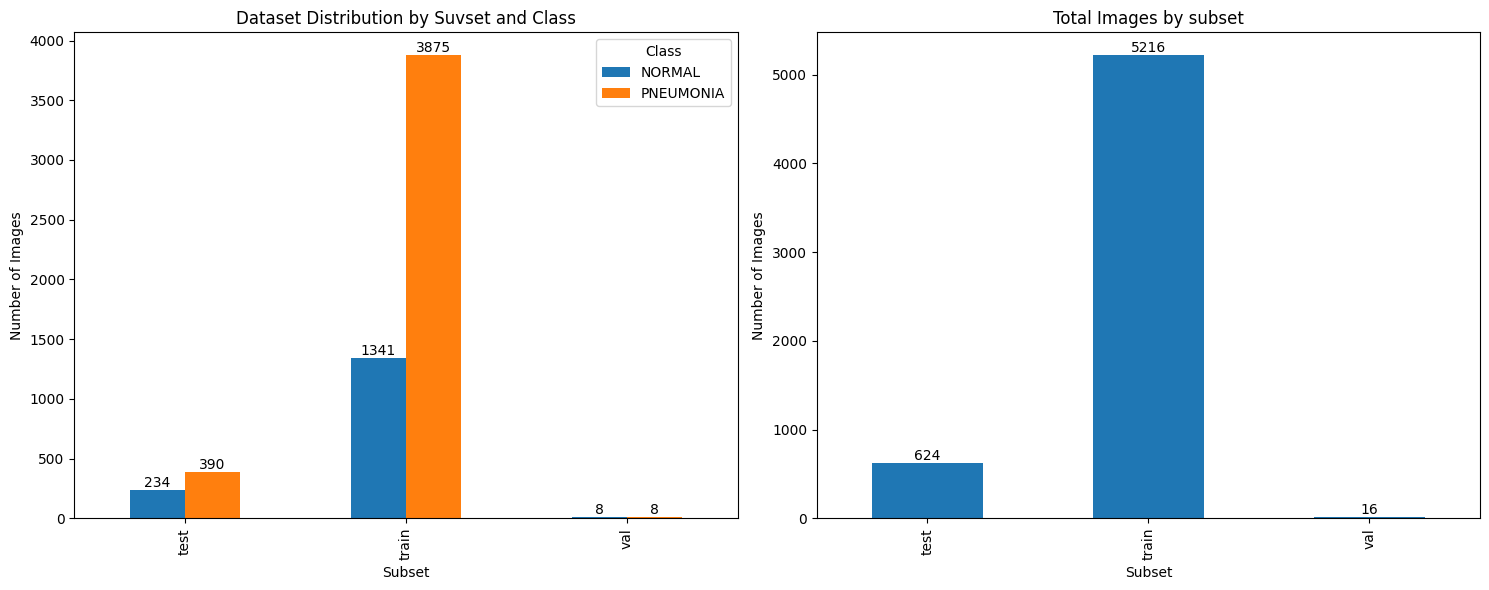

In [17]:
#Dataset Structure
import os

directory_search = os.listdir("../data/chest_xray")
print("The data included in this dataset is split into the following subsets: ", directory_search)

data_summary = []

#File count for each data subset - visualization
for subset in directory_search:
    subset_path = f"../data/chest_xray/{subset}"
    classes = os.listdir(subset_path)
    for class_name in classes:
        class_path = f"{subset_path}/{class_name}"
        file_count = len(os.listdir(class_path)) 
        data_summary.append({'Subset': subset, 'Class': class_name,'Count': file_count})

df = pd.DataFrame(data_summary)
print(df)

#Create visualization
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,6))

#Grouped bar chart
bars1 = df.pivot(index='Subset',columns = 'Class',
            values = 'Count').plot(kind='bar',ax=ax1)
ax1.bar_label(ax1.containers[0])
ax1.bar_label(ax1.containers[1])
ax1.set_title('Dataset Distribution by Suvset and Class')
ax1.set_ylabel('Number of Images')
ax1.legend(title='Class')

#Total counts by subset
subset_totals = df.groupby('Subset')['Count'].sum()
bars2 = subset_totals.plot(kind='bar',ax=ax2)
ax2.bar_label(ax2.containers[0])
ax2.set_title('Total Images by subset')
ax2.set_ylabel('Number of Images')

plt.tight_layout()

plt.show
                